# Install Necessary Libraries

In [1]:
%pip install nltk
%pip install emoji
%pip install pandas
%pip install wordcloud



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install nltk
!pip install emoji
!pip install pandas
!pip install wordcloud

# # Preprocessing Text Data for Sentiment Analysis

In [ ]:
# Import necessary libraries for preprocessing
import pandas as pd
import re
import nltk
import os
import string

# Ensure NLTK stopwords are downloaded
try:
    nltk_data_dir = os.path.join(os.path.expanduser('~'), 'nltk_data')
    os.makedirs(nltk_data_dir, exist_ok=True)
    nltk.download('stopwords', download_dir=nltk_data_dir)
    nltk.data.path.append(nltk_data_dir)
except Exception as e:
    print(f"Error downloading NLTK resources: {e}")

from nltk.corpus import stopwords

def preprocess_text(text):
    # Ensure text is a string and convert to lowercase
    text = str(text).lower()
    
    # Remove URLs starting with http or https
    text = re.sub(r'https?://\S+', '', text)
    
    # Remove image file extensions (.jpg, .jpeg, .png, .gif, .bmp, .tiff)
    text = re.sub(r'\.(jpg|jpeg|png|gif|bmp|tiff)', '', text)
    
    # Remove emojis
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Remove non-ASCII characters (which includes emojis)
    
    # Remove hashtags
    text = re.sub(r'#\S+', '', text)
    
    # Tokenization: split on whitespace
    tokens = text.split()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    
    # Filter tokens: remove stopwords and keep only alphabetic words
    cleaned_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    
    # Join the cleaned tokens back into a string
    return ' '.join(cleaned_tokens)

# Main processing script
def process_hogwarts_posts():
    try:
        # Load the CSV file
        df = pd.read_csv("hogwarts_legacy_gaming_alltime_posts.csv")
        
        # Apply preprocessing to the 'Title' column
        df['cleaned_title'] = df['Title'].apply(preprocess_text)
        
        # Save only the cleaned data (just the 'cleaned_title' column) to a new CSV
        df[['cleaned_title']].to_csv("hogwarts_legacy_cleaned_posts.csv", index=False)
        
        # Print some statistics (for debugging)
        print(f"Total posts processed: {len(df)}")
        print("\nFirst 5 cleaned titles:")
        print(df['cleaned_title'].head())
        
        return df
    
    except Exception as e:
        print(f"Error processing CSV: {e}")
        return None

# Run the processing
if __name__ == "__main__":
    processed_df = process_hogwarts_posts()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thega\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Total posts processed: 1000

First 5 cleaned titles:
0                      please let travel
1                       two types people
2    every five steps dont miss anything
3          got little carried away first
4          found merlin trial walk today
Name: cleaned_title, dtype: object


# Sentiment Analysis Using VADER

Sentiment analysis complete. Results saved to 'hogwarts_vader_sentiments.csv'.
Sentiment
Neutral     535
Positive    302
Negative    163
Name: count, dtype: int64


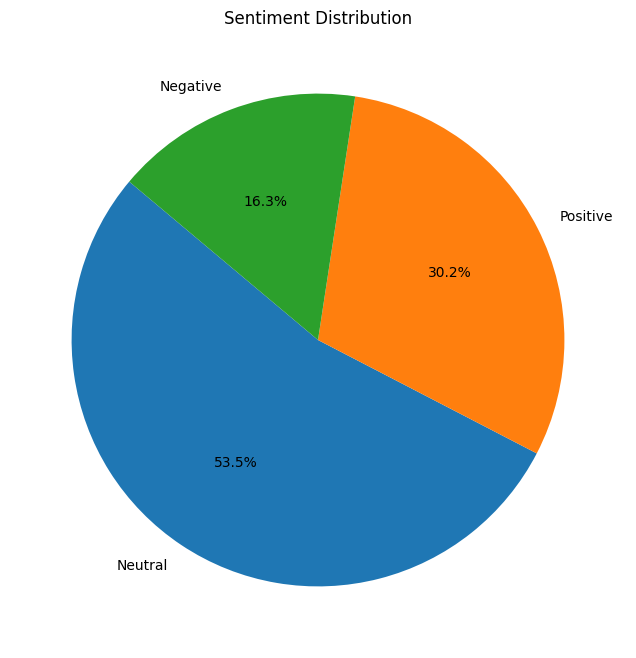

Top words for Positive sentiment:
[('like', 40), ('game', 32), ('hogwarts', 29), ('love', 22), ('legacy', 17), ('one', 17), ('playing', 15), ('im', 14), ('time', 12), ('favorite', 11), ('great', 11), ('character', 11), ('best', 10), ('much', 10), ('pretty', 10), ('first', 10), ('think', 9), ('looks', 9), ('anyone', 9), ('good', 8)]



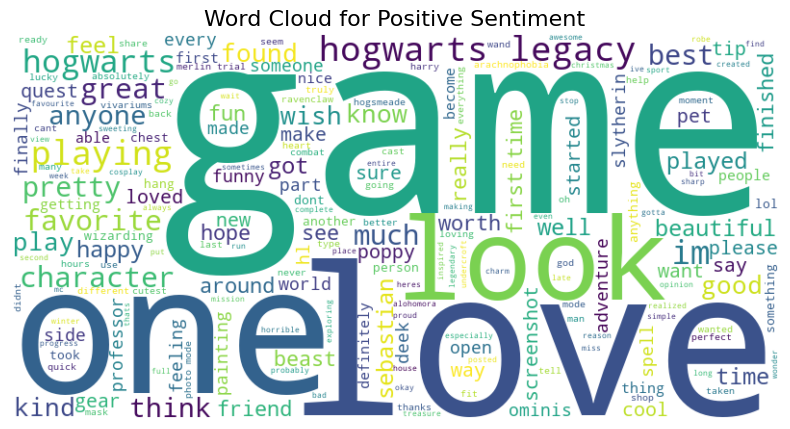

Top words for Negative sentiment:
[('else', 10), ('bad', 9), ('im', 8), ('game', 8), ('hard', 7), ('anyone', 7), ('hogwarts', 6), ('hate', 6), ('like', 6), ('one', 6), ('accidentally', 6), ('feel', 5), ('got', 5), ('poor', 4), ('dont', 4), ('thought', 4), ('legacy', 4), ('found', 4), ('kill', 4), ('quest', 4)]



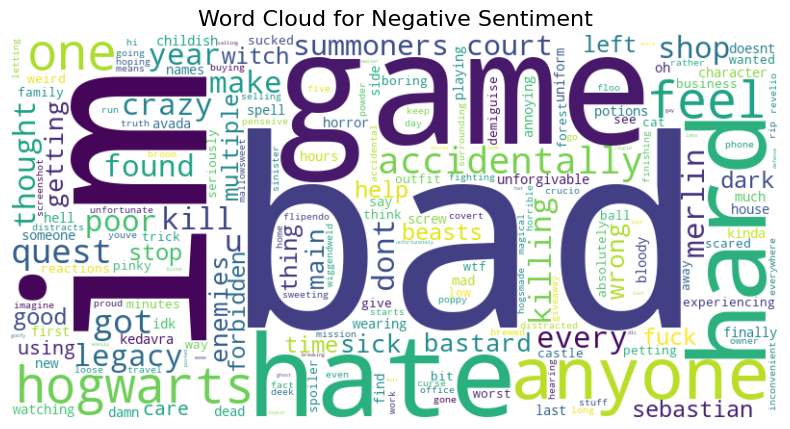

Top words for Neutral sentiment:
[('hogwarts', 42), ('game', 27), ('merlin', 25), ('anyone', 23), ('trial', 20), ('else', 17), ('one', 17), ('legacy', 17), ('got', 16), ('know', 16), ('get', 16), ('found', 15), ('think', 15), ('finally', 15), ('time', 14), ('first', 13), ('mine', 12), ('cant', 11), ('room', 10), ('demiguise', 10)]



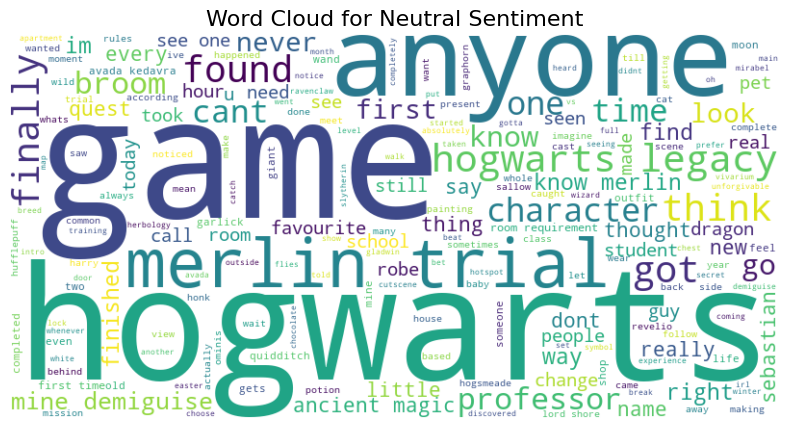

In [ ]:
# Import necessary libraries for Vader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

# Load the cleaned data
df = pd.read_csv("hogwarts_legacy_cleaned_posts.csv")

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to classify sentiment using VADER
def classify_sentiment_vader(text):
    # Ensure the input is a string
    text = str(text) if not pd.isnull(text) else ""
    # Get sentiment scores from VADER
    scores = analyzer.polarity_scores(text)
    # Classify sentiment based on the compound score
    if scores['compound'] >= 0.05:
        return "Positive"
    elif scores['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply VADER sentiment classification to the cleaned titles
df['Sentiment'] = df['cleaned_title'].apply(classify_sentiment_vader)

# Save results to a new CSV file
output_file = "hogwarts_vader_sentiments.csv"
df.to_csv(output_file, index=False)

# Print a summary of the results
print(f"Sentiment analysis complete. Results saved to '{output_file}'.")
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

# Plot the pie chart for sentiment distribution
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title("Sentiment Distribution")
plt.show()

# Function to get frequent words for a specific sentiment
def get_frequent_words(sentiment, n=20):
    # Filter the dataframe by sentiment
    filtered_text = df[df['Sentiment'] == sentiment]['cleaned_title'].dropna()
    # Combine all cleaned titles into a single string
    all_words = ' '.join(filtered_text).split()
    # Count word frequencies
    word_counts = Counter(all_words)
    return word_counts.most_common(n)

# Function to generate a word cloud for a specific sentiment
def generate_wordcloud(sentiment, title):
    filtered_text = df[df['Sentiment'] == sentiment]['cleaned_title'].dropna()
    text = ' '.join(filtered_text)
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Analyze frequent words and generate word clouds for each sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    # Get the most frequent words
    frequent_words = get_frequent_words(sentiment)
    print(f"Top words for {sentiment} sentiment:")
    print(frequent_words)
    print()
    
    # Generate and display the word cloud
    generate_wordcloud(sentiment, f"Word Cloud for {sentiment} Sentiment")


# Sentiment Analysis Using BERT